# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br> <br>
2. **Data Cleaning:**
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations<br><br>
3. **Data Visualization:** Using plots to find relations between the features.
 - Restaurants delivering Online or not
 - Restaurants having table booking or not
 - No. of restaurants in a Location
 - Best Location
 - Relation between Location and Rating
 - Restaurant Type
 - Relation between Restaurant Type and Rating
 - Types of Services
 - Relation between Service Type and Rating
 - Cost of Restuarant
 - Most famous restaurant chains in Bengaluru 
 - Most Popular Dishes in Bengaluru 
 - Most Popular Cuisines in Bengaluru 
 - Relationship between Rating and Online Order
  

# Importing Libraries

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#reading the dataset
zomato = pd.read_csv('zomato.csv')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato['url'][0]

'https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'

In [4]:
# Making a shallow copy of entire dataset
d = zomato.copy()

In [5]:
###################################################

In [6]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


<b>At this point, only VOTES column is numeric </b>

In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Deleting Unnnecessary Columns
data = zomato.drop(['url','phone','dish_liked'],axis = 1) #Dropping the columns "dish_liked", "phone", "url" 
data.head() 

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
#Checking the no. of Duplicates records
data.duplicated().sum()

43

In [10]:
# Removing the Duplicate records
data.drop_duplicates(inplace = True)
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
#Remove the NaN values from the dataset
data.isnull().sum()  # or data.isna().sum()
data.dropna(how='any',inplace=True)
data.isnull().sum()  # or data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [12]:
#Reading Column Names
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
#Changing the column names
data = data.rename(columns={'approx_cost(for two people)' : 'cost','listed_in(type)' : 'type','listed_in(city)' : 'city'})

In [14]:
#Some Transformations
data['cost'].tail

<bound method NDFrame.tail of 0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: cost, Length: 43499, dtype: object>

In [15]:
#Some Transformations 

# Removing ',' from Cost Column
data['cost'] = data['cost'].replace(regex = [','], value = '')

# Converting data Type to INTEGER
data['cost'] = data['cost'].astype(int)
data['votes'] = data['votes'].astype(int)

In [16]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
#Reading uninque values from the Rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
#Removing 'NEW','-','/5' from Rates
data = data.loc[data['rate'] != 'NEW']
data = data.loc[data['rate'] != '-'].reset_index(drop = True)

data['rate'] = data['rate'].apply(lambda x: x.replace('/5',''))
data['rate'] = data['rate'].astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int32  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  int32  
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(1), int32(2), object(11)
memory usage: 4.1+ MB


In [20]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
# Mapping Yes to 1 and No to 0 for Online Order column
z = data['online_order'].map({'Yes':1,'No':0})
data['online_order'] = z

In [23]:
# Mapping Yes to 1 and No to 0 for book_table column
y = data.book_table.map({'Yes':1,'No':0})
y
data['book_table'] = y

In [24]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  int64  
 3   book_table    41237 non-null  int64  
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int32  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  int32  
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(9)
memory usage: 4.1+ MB


<AxesSubplot:>

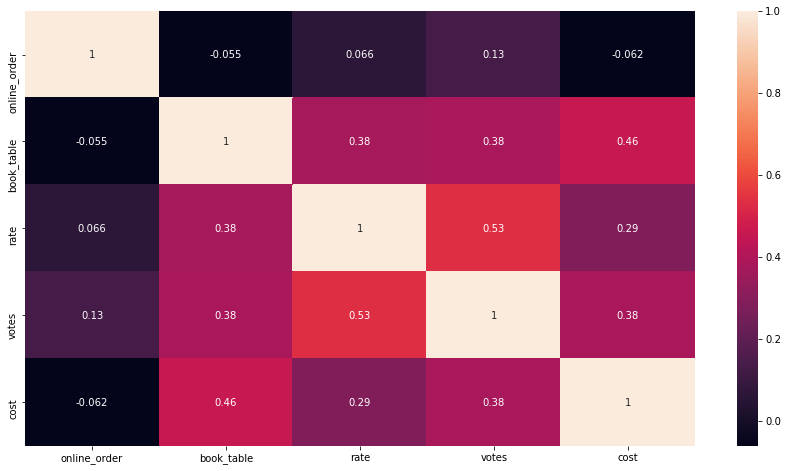

In [26]:
#Get Correlation between different variables
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [27]:
#As we are not getting most of the columns due to object(string) data type
#we will Encode those input variables

def encode(zomato_data):
    for column in zomato_data.columns[~zomato_data.columns.isin(['rate','cost','votes'])]:
        zomato_data[column] = zomato_data[column].factorize()[0]
    return zomato_data

data_encoded = encode(data.copy())
data_encoded.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600,4,0,0,0


<AxesSubplot:>

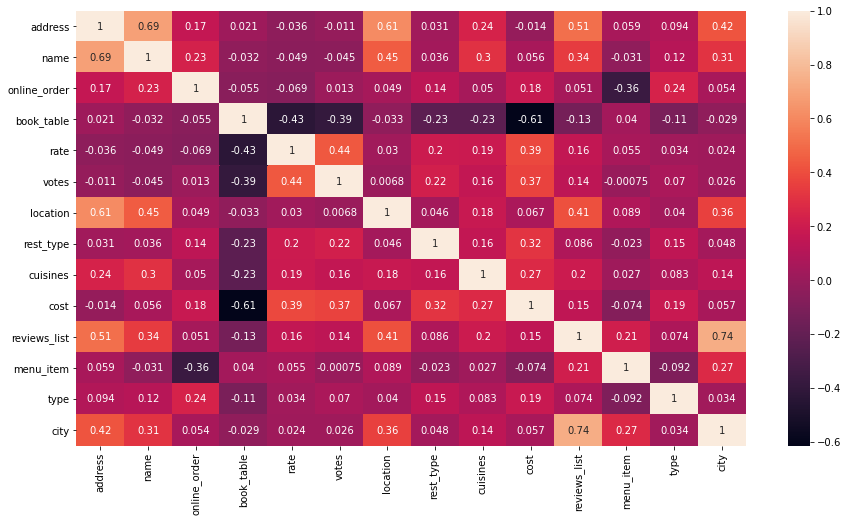

In [28]:
#Get Correlation between different variables
corr = data_encoded.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [29]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Visualization

### Online orders

<b>Q]Are there any restaurants accepting online orders, if yes, how many?</b>

In [30]:
# Restaurants accepting Online orders
data.online_order.value_counts()

1    27081
0    14156
Name: online_order, dtype: int64

C:\Users\yatin.chadha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Online Orders')

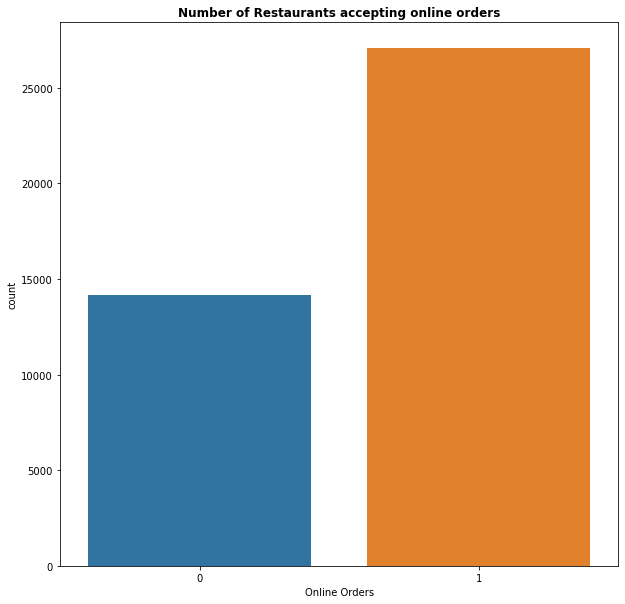

In [31]:
sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('Online Orders')

### Book Table

<b>Q]Are there any restaurants having the option to book a table , if yes, how many? </b>

In [32]:
# Restaurants allowing table booking or not
data.book_table.value_counts()

0    34938
1     6299
Name: book_table, dtype: int64

C:\Users\yatin.chadha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Restaurants accepting TABLE BOOKING')

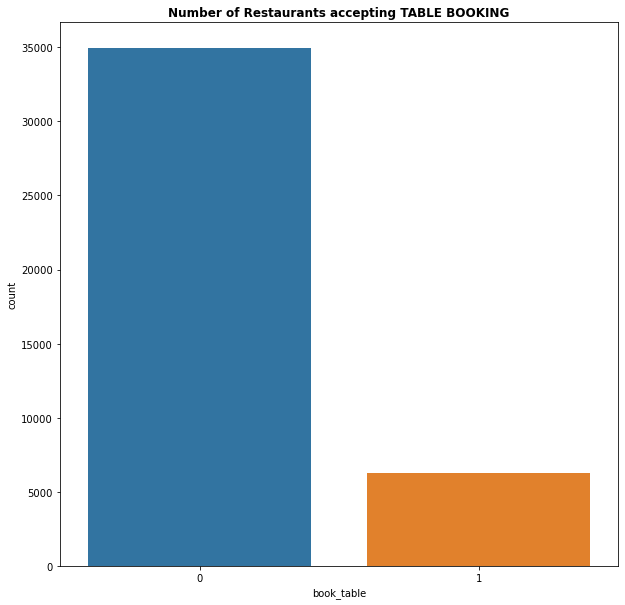

In [33]:
sns.countplot(data['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Number of Restaurants accepting TABLE BOOKING', weight='bold')

### LOCATION

### (No. of Restaurants in a Location)

In [34]:
data.location.nunique()
#d.location.nunique()

92

In [35]:
#d['location'].where(d['location']=='Bellandur').value_counts()
data['location'].where(data['location']=='Bellandur').value_counts()

Bellandur    997
Name: location, dtype: int64

C:\Users\yatin.chadha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


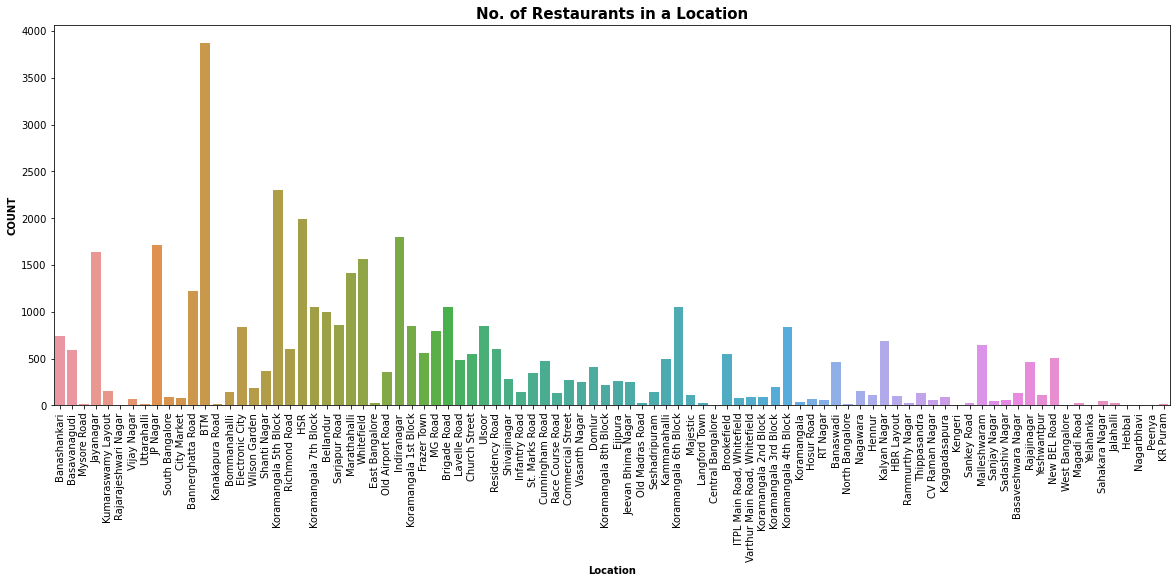

In [36]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(data['location'],data = data)
loc.set_xticklabels(loc.get_xticklabels(), rotation = 90)
plt.xlabel('Location',fontsize = 10, fontweight = 'bold')
plt.ylabel('COUNT',fontsize = 10, fontweight = 'bold')
plt.title('No. of Restaurants in a Location', fontsize = 15, fontweight = 'bold')
plt.show()

#data['location'].value_counts().plot(kind = 'bar')

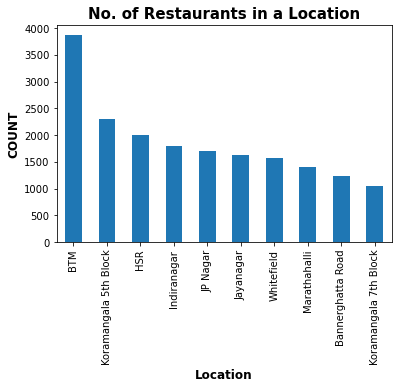

In [37]:
# Checking for Top 10 Locations with maximum Restaurants

#d['location'].value_counts()[:10].plot(kind = 'bar') 
data['location'].value_counts()[:10].plot(kind = 'bar')
plt.xlabel('Location',fontsize = 12, fontweight = 'bold')
plt.ylabel('COUNT',fontsize = 12, fontweight = 'bold')
plt.title('No. of Restaurants in a Location', fontsize = 15, fontweight = 'bold')
plt.show()

In [38]:
data.location.value_counts()

BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

<AxesSubplot:title={'center':'Location'}, ylabel='location'>

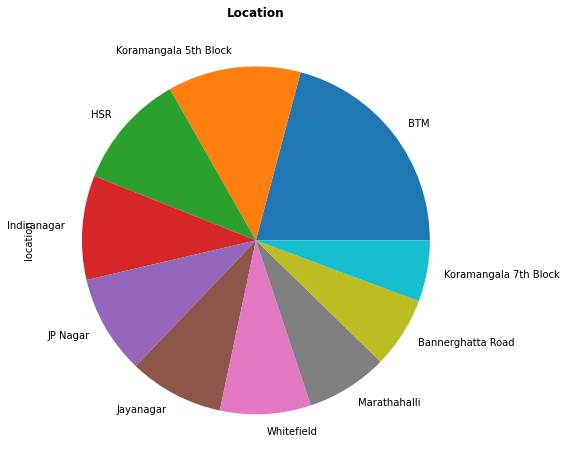

In [39]:
plt.figure(figsize=(14,8))
plt.title('Location', weight = 'bold',loc = 'center')
data.location.value_counts()[:10].plot(kind='pie')

<b> Percentage of restaurants present in that location <b>

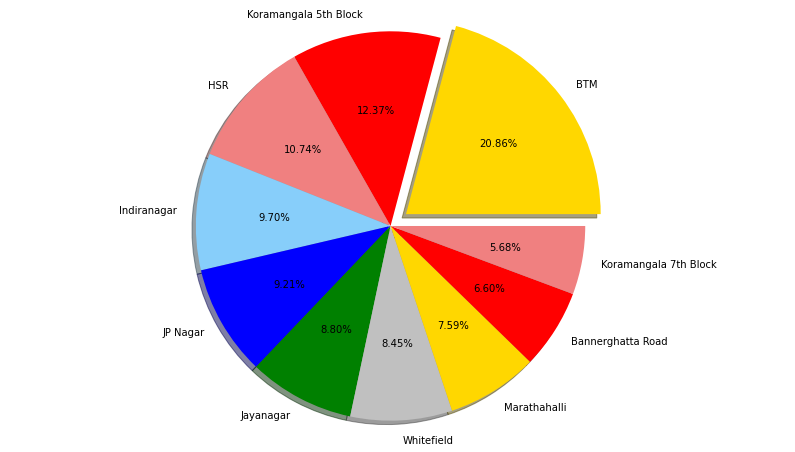

In [40]:
plt.figure(figsize=(14,8))
values = data.location.value_counts()[:10].values
index = data.location.value_counts()[:10].index
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = [0.1,0,0,0,0,0,0,0,0,0]
plt.pie(values,labels = index,colors=colors,shadow=True, explode = explode,autopct='%1.2f%%')
plt.axis('equal')
plt.show()

# Note:-

<b>So we have 93 Neighbourhoods in Bangalore.<b><br>
<b>We have the highest no of restaurants in BTM.<b><br>
<b>We have the least is in Bellandur (in Top 10 list).<b>

### Relation between Location and Rating

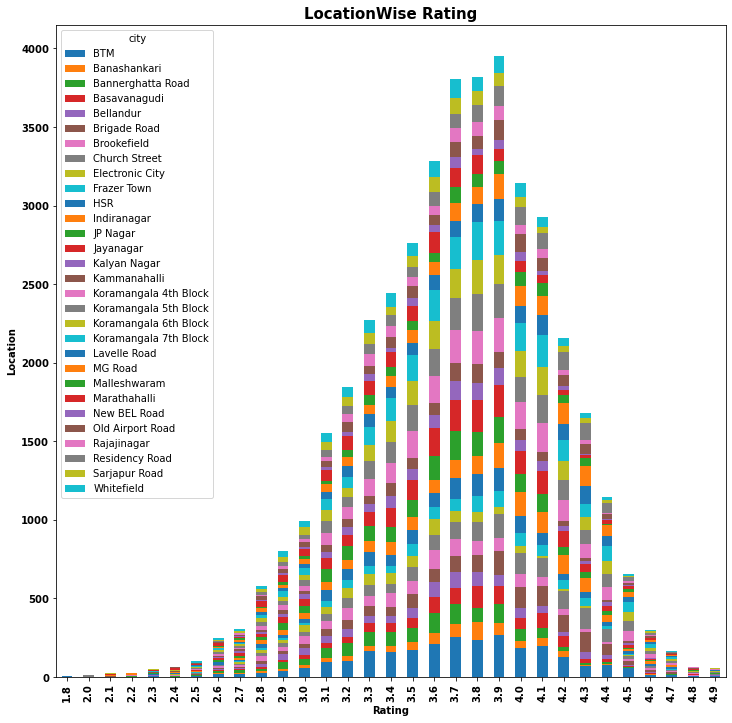

In [41]:
loc_rat_crossTab = pd.crosstab(data['rate'],data['city']);
loc_rat_crossTab.plot(kind = 'bar', stacked =True);
fig = plt.gcf();
fig.set_size_inches(12,12);
plt.title('LocationWise Rating', fontsize=15, fontweight = 'bold');
plt.xlabel('Rating',fontsize=10, fontweight = 'bold');
plt.ylabel('Location',fontsize=10, fontweight = 'bold');
plt.xticks(fontsize=10, fontweight = 'bold');
plt.yticks(fontsize=10, fontweight = 'bold');
plt.show();

### Restaurant Type


In [42]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [43]:
data['rest_type'].value_counts()[:10]

Quick Bites           13871
Casual Dining          9608
Cafe                   3368
Dessert Parlor         1850
Delivery               1666
Takeaway, Delivery     1278
Casual Dining, Bar     1092
Bakery                  704
Bar                     640
Beverage Shop           639
Name: rest_type, dtype: int64

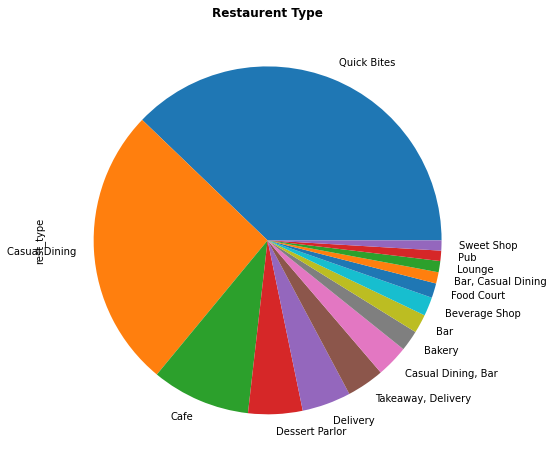

In [44]:
plt.figure(figsize = (14,8))
data.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [45]:
#colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','silver']

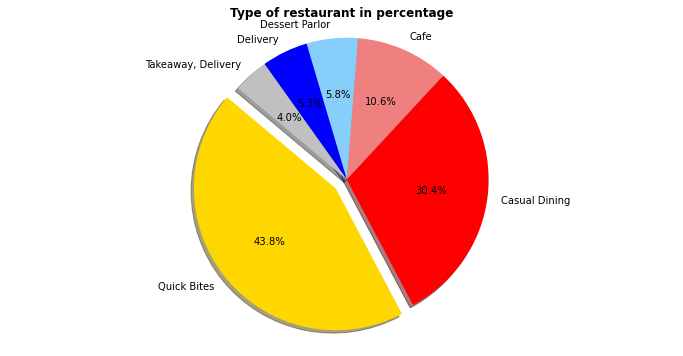

In [46]:
plt.figure(figsize = (12,6))
names = data['rest_type'].value_counts()[:6].index
values = data['rest_type'].value_counts()[:6].values
explode = [0.1, 0, 0, 0,0,0]  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

We have the most frequently visited Restaurant type - <b>Quickbites<b>

### Relation between Restaurant type and Rating

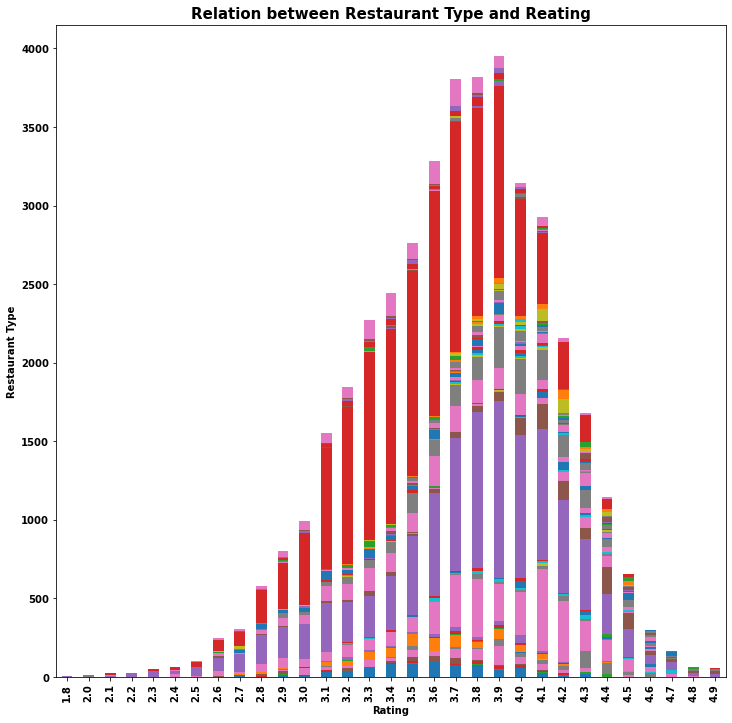

In [47]:
restType_rating = pd.crosstab(data['rate'],data['rest_type'])
restType_rating.plot(kind = 'bar', stacked = True)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.xlabel('Rating',fontsize = 10, fontweight = 'bold')
plt.ylabel('Restaurant Type',fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Relation between Restaurant Type and Reating',fontsize = 15, fontweight = 'bold')
plt.legend().remove() # Legends arre removed due to large number of distict values
plt.show()

### Types of Services

In [48]:
data.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

Text(0.5, 1.0, 'Different Types of Services Available in percenetage')

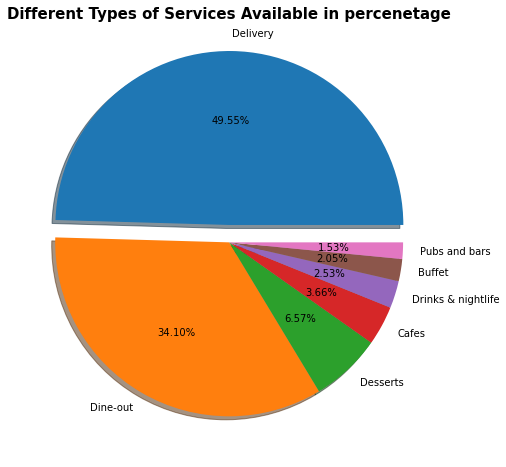

In [49]:
plt.figure(figsize=(14,8))
label = data['type'].value_counts().index
values = data['type'].value_counts().values
explode = [0.1,0,0,0,0,0,0]
plt.pie(values,labels=label,explode = explode, autopct="%1.2f%%",shadow = True)
plt.title('Different Types of Services Available in percenetage',fontsize=15, fontweight = 'bold')

### Relation between Service Type and Rating

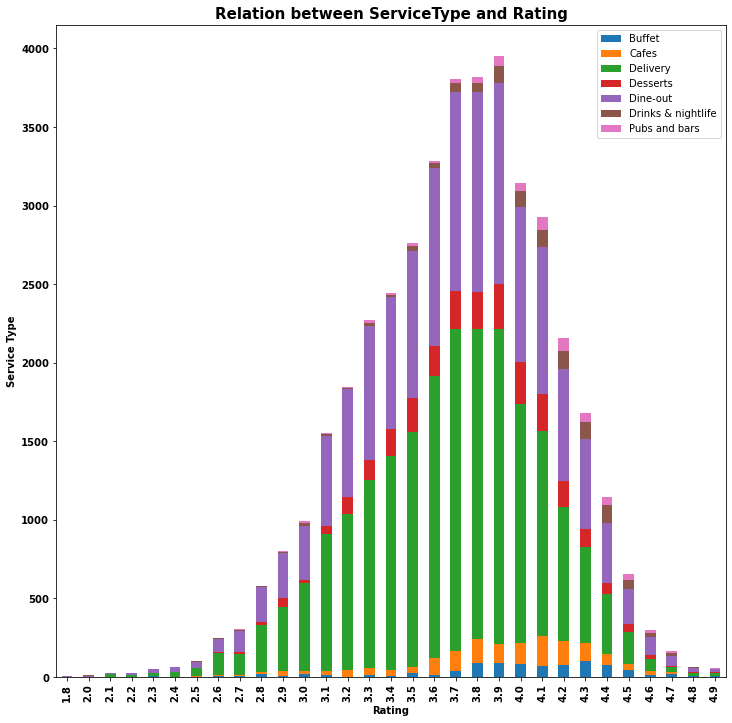

In [50]:
serviceType_Rating = pd.crosstab(data['rate'],data['type'])
serviceType_Rating.plot(kind = 'bar',stacked = True)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Relation between ServiceType and Rating',fontsize = 15, fontweight = 'bold')
plt.xlabel('Rating',fontsize = 10, fontweight = 'bold')
plt.ylabel('Service Type', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.legend(loc = 'upper right')
plt.show()

### Average Cost

In [51]:
data.cost.value_counts()

400     5261
300     5242
500     4080
600     3189
200     3163
        ... 
4500       2
70         1
80         1
3700       1
5000       1
Name: cost, Length: 63, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Avg cost in for Top 20 Restaurent for 2 people')

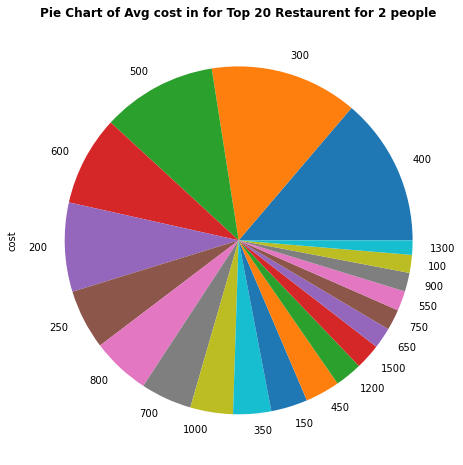

In [52]:
plt.figure(figsize = (12,8))
data.cost.value_counts()[:20].plot(kind = 'pie')
plt.title('Pie Chart of Avg cost in for Top 20 Restaurent for 2 people',weight = 'bold')

In [53]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

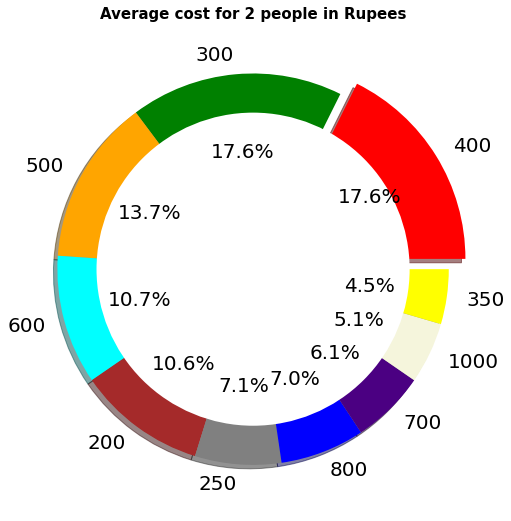

In [54]:
plt.figure(figsize=(20,9))
values = data.cost.value_counts()[:10].values
index = data.cost.value_counts()[:10].index
explode = [0.1, 0, 0, 0,0,0,0,0,0,0]
plt.pie(values,labels=index,shadow=True,explode = explode,colors = colors,autopct='%1.1f%%',textprops={'fontsize': 20})

#draw circle
centre_circle = plt.Circle((0,0),radius = 0.80,fc='white')
fig = plt.gcf() # Get Current Figure
fig.gca().add_artist(centre_circle) # Get Current Axes

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

<b>Note:- The Average cost for two persons in Banglore is 300rupees <b>

### Most famous Restaurant chains in Bengaluru

In [55]:
data['name'].value_counts().head()

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Five Star Chicken    68
Kanti Sweets         68
Name: name, dtype: int64

C:\Users\yatin.chadha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Famous Restaurant Chains in Bengaluru ')

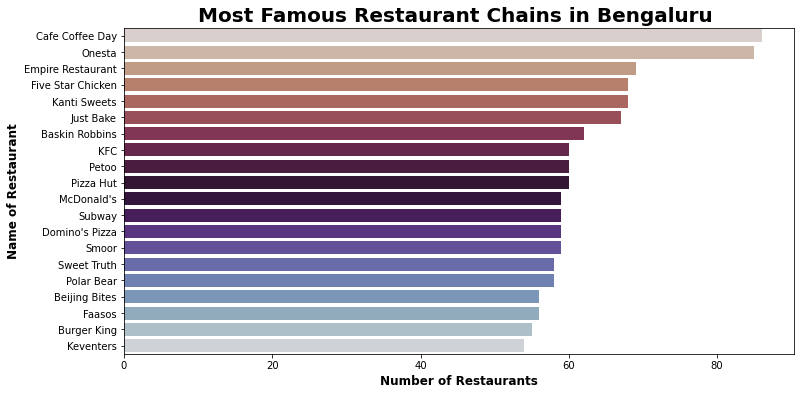

In [56]:
plt.figure(figsize=(12,6))
values = data.name.value_counts()[:20].values
labels = data.name.value_counts()[:20].index
sns.barplot(values,labels,data = data, palette='twilight_r')
plt.ylabel('Name of Restaurant', fontsize = 12, fontweight = 'bold')
plt.xlabel('Number of Restaurants', fontsize = 12, fontweight = 'bold')
plt.title("Most Famous Restaurant Chains in Bengaluru ",fontsize =20, weight = 'bold')

<b>Cafe Coffee Day</b> has the most number of Restaurents.

### Most Popular Dishes

In [57]:
d.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [58]:
d.dish_liked.isna().sum()

28078

In [59]:
# delete the nulll values
dishes_data = d[d.dish_liked.notnull()]
dishes_data['dish_liked'] = dishes_data.dish_liked.apply(lambda x : x.lower().strip())

<ipython-input-59-2b6427e74c8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dishes_data['dish_liked'] = dishes_data.dish_liked.apply(lambda x : x.lower().strip())


In [60]:
dishes_data.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                            30
votes                            0
phone                          339
location                         0
rest_type                       70
dish_liked                       0
cuisines                         0
approx_cost(for two people)    136
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [61]:
dishes_data.dish_liked.head()

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
Name: dish_liked, dtype: object

In [62]:
# check for reference

for i in dishes_data.dish_liked[:5]:
    print(i)

pasta, lunch buffet, masala papad, paneer lajawab, tomato shorba, dum biryani, sweet corn soup
momos, lunch buffet, chocolate nirvana, thai green curry, paneer tikka, dum biryani, chicken biryani
churros, cannelloni, minestrone soup, hot chocolate, pink sauce pasta, salsa, veg supreme pizza
masala dosa
panipuri, gol gappe


In [63]:
# check for reference
dishes_count = []
for i in dishes_data.dish_liked[:5]:
    for t in i.split(','):
        print(t) 

pasta
 lunch buffet
 masala papad
 paneer lajawab
 tomato shorba
 dum biryani
 sweet corn soup
momos
 lunch buffet
 chocolate nirvana
 thai green curry
 paneer tikka
 dum biryani
 chicken biryani
churros
 cannelloni
 minestrone soup
 hot chocolate
 pink sauce pasta
 salsa
 veg supreme pizza
masala dosa
panipuri
 gol gappe


In [64]:
# count each dish to see how many times each dish repeated
dishes_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        dishes_count.append(t.strip())  # strip() : to remove left/right spaces   

In [65]:
pd.Series(dishes_count).value_counts()

pasta                    3409
burgers                  3024
cocktails                2832
pizza                    2737
biryani                  2092
                         ... 
triple sundae               1
mocha coffee                1
dal bati churma thali       1
lychee sundae               1
chicken rezala              1
Length: 2792, dtype: int64

Text(0, 0.5, 'Count')

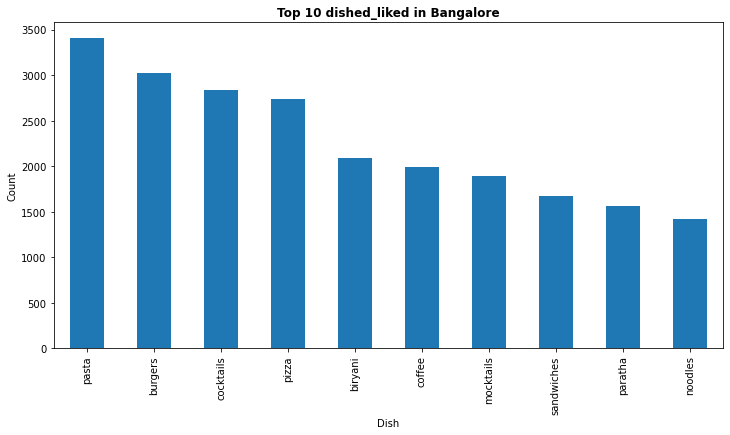

In [66]:
plt.figure(figsize=(12,6)) 
pd.Series(dishes_count).value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

The Most liked dish in Banglore is <b>Pasta<b>

### Most Popular Cuisines

In [67]:
d.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [68]:
# delete the nulll values
cuisines = d[d.cuisines.notnull()]
cuisines.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [69]:
cuisines_data = []
for i in cuisines.cuisines:
    for t in i.split(','):
        cuisines_data.append(t.strip())

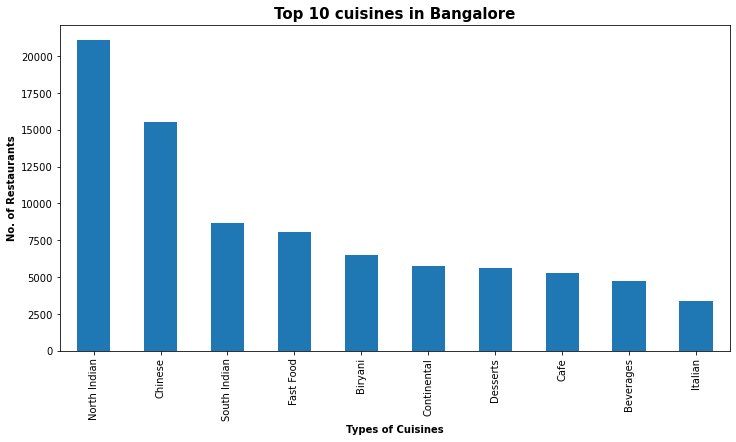

In [70]:
plt.figure(figsize=(12,6))
pd.Series(cuisines_data).value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 cuisines in Bangalore', fontsize = 15, fontweight = 'bold')
plt.xlabel('Types of Cuisines', fontsize = 10, fontweight = 'bold')
plt.ylabel('No. of Restaurants', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

<b>The Most liked Cuisine in Banglore is North Indian <b>

# Rate vs Online Order

Text(0.5, 1.0, 'rate vs oline order')

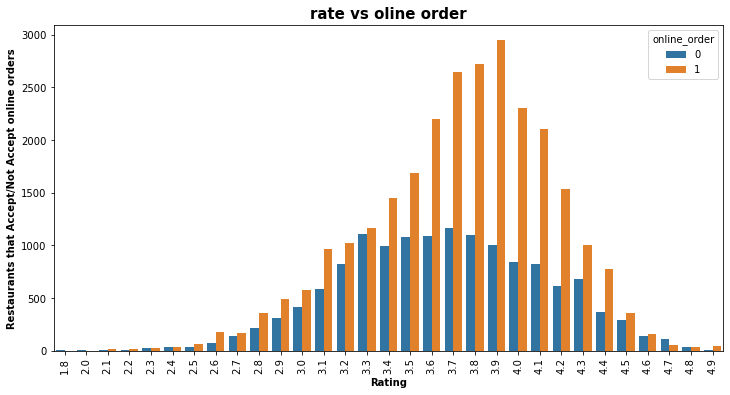

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['rate'],hue=data.online_order)
plt.ylabel("Restaurants that Accept/Not Accept online orders", weight = 'bold')
plt.xlabel('Rating',weight = 'bold',fontsize = 10)
plt.xticks(rotation = 90)
plt.title("rate vs oline order",weight = 'bold', fontsize = 15)

- There is a clear effect on **Rating** with respect to **Online order**